In [17]:
library(tidyverse)
library(glue)

In [18]:
base_path = "/home/jakobs"

project_path = glue("{base_path}/data")
experiment = '230321'
experiment_path = glue("{project_path}/{experiment}")

In [67]:
endpoint_defs = arrow::read_feather(glue("{base_path}/data/endpoints_epic_md.feather"))
endpoints = endpoint_defs$endpoint

In [68]:
endpoint_selection = c(
    # generally very important
    "phecode_202", # Diabetes mellitus
    "phecode_401",	#Hypertension"  
    "phecode_404", # Ischemic heart disease   
    "phecode_404-1", # Myocardial infarction [Heart attack]
    "phecode_431-11", # Cerebral infarction [Ischemic stroke]
    "phecode_424", # Heart failure

    
    #"phecode_059-1", # COVID 19
    "phecode_468", # Pneumonia
    "phecode_474", # Chronic obstructive pulmonary disease [COPD]
      
    "phecode_286-2", #	Major depressive disorder
    "phecode_324-11", #Parkinson's Disease
    "phecode_328", # Dementias and cerebral degeneration

    
    "phecode_164", # Anemia
    "phecode_726-1", # Osteoporosis
    "phecode_371", # Cataract
   # "phecode_374-42", # Diabetic retinopathy
   # "phecode_374-5", # Macular degeneration
   # "phecode_375-1", # Glaucoma
    
    
    "phecode_103", # Malignant neoplasm of the skin
    "phecode_101", # Malignant neoplasm of the digestive organs
    "phecode_102", # LUNG CANCER
    
    "phecode_583", # Chronic kidney disease    
    "phecode_542", # Chronic liver disease and sequelae    
    "OMOP_4306655") # All-Cause Death

endpoint_defs = endpoint_defs %>% 
    mutate(name = phecode_string) %>%
    mutate(name = 
           case_when( 
               phecode_string == "Myocardial infarction [Heart attack]"~"Myocardial infarction",
               phecode_string == "Cerebral infarction [Ischemic stroke]"~"Ischemic stroke",
               phecode_string == "Chronic obstructive pulmonary disease [COPD]"~"Chronic obstructive pulmonary disease",
               phecode_string == "Mitral valve insufficiency"~"Mitral insufficiency",
               phecode_string == "Parkinson's disease (Primary)"~"Parkinson's disease",
               phecode_string == "Suicide ideation and attempt or self harm"~"Suicide attempt",
               phecode_string == "Ischemic heart disease"~"Coronary heart disease",
               phecode_string == "Chronic kidney disease"~"Chronic kidney disease",
               phecode_string == "Rheumatic fever and chronic rheumatic heart diseases"~"Rheumatic heart disease",
               phecode_string == "Abdominal aortic aneurysm"~"Abdominal aortic aneurysm",
                  TRUE ~ name)
           )
            
endpoint_map = endpoint_defs$name
names(endpoint_map) =  endpoint_defs$endpoint
#endpoint_order = (endpoint_defs %>% arrange(as.numeric(phecode)))$endpoint
endpoint_order = endpoint_selection

In [69]:
data_outcomes_long = arrow::read_feather(glue("{base_path}/data/data_outcomes_long_230320.feather")) %>% filter(endpoint %in% endpoint_selection)

In [71]:
base_size = 8
title_size = 10
facet_size = 8.5
geom_text_size=3
theme_set(theme_classic(base_size = base_size) + 
          theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0), 
                strip.text.x = element_text(size = facet_size),axis.title=element_text(size=10), axis.text=element_text(size=8, color="black"),
                legend.position="bottom", axis.line = element_line(size = 0.2), axis.ticks=element_line(size=0.2)))

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


Warning message:
“The following aesthetics were dropped during statistical transformation: status
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: status
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: status
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: status
ℹ This can happen when ggplot fa

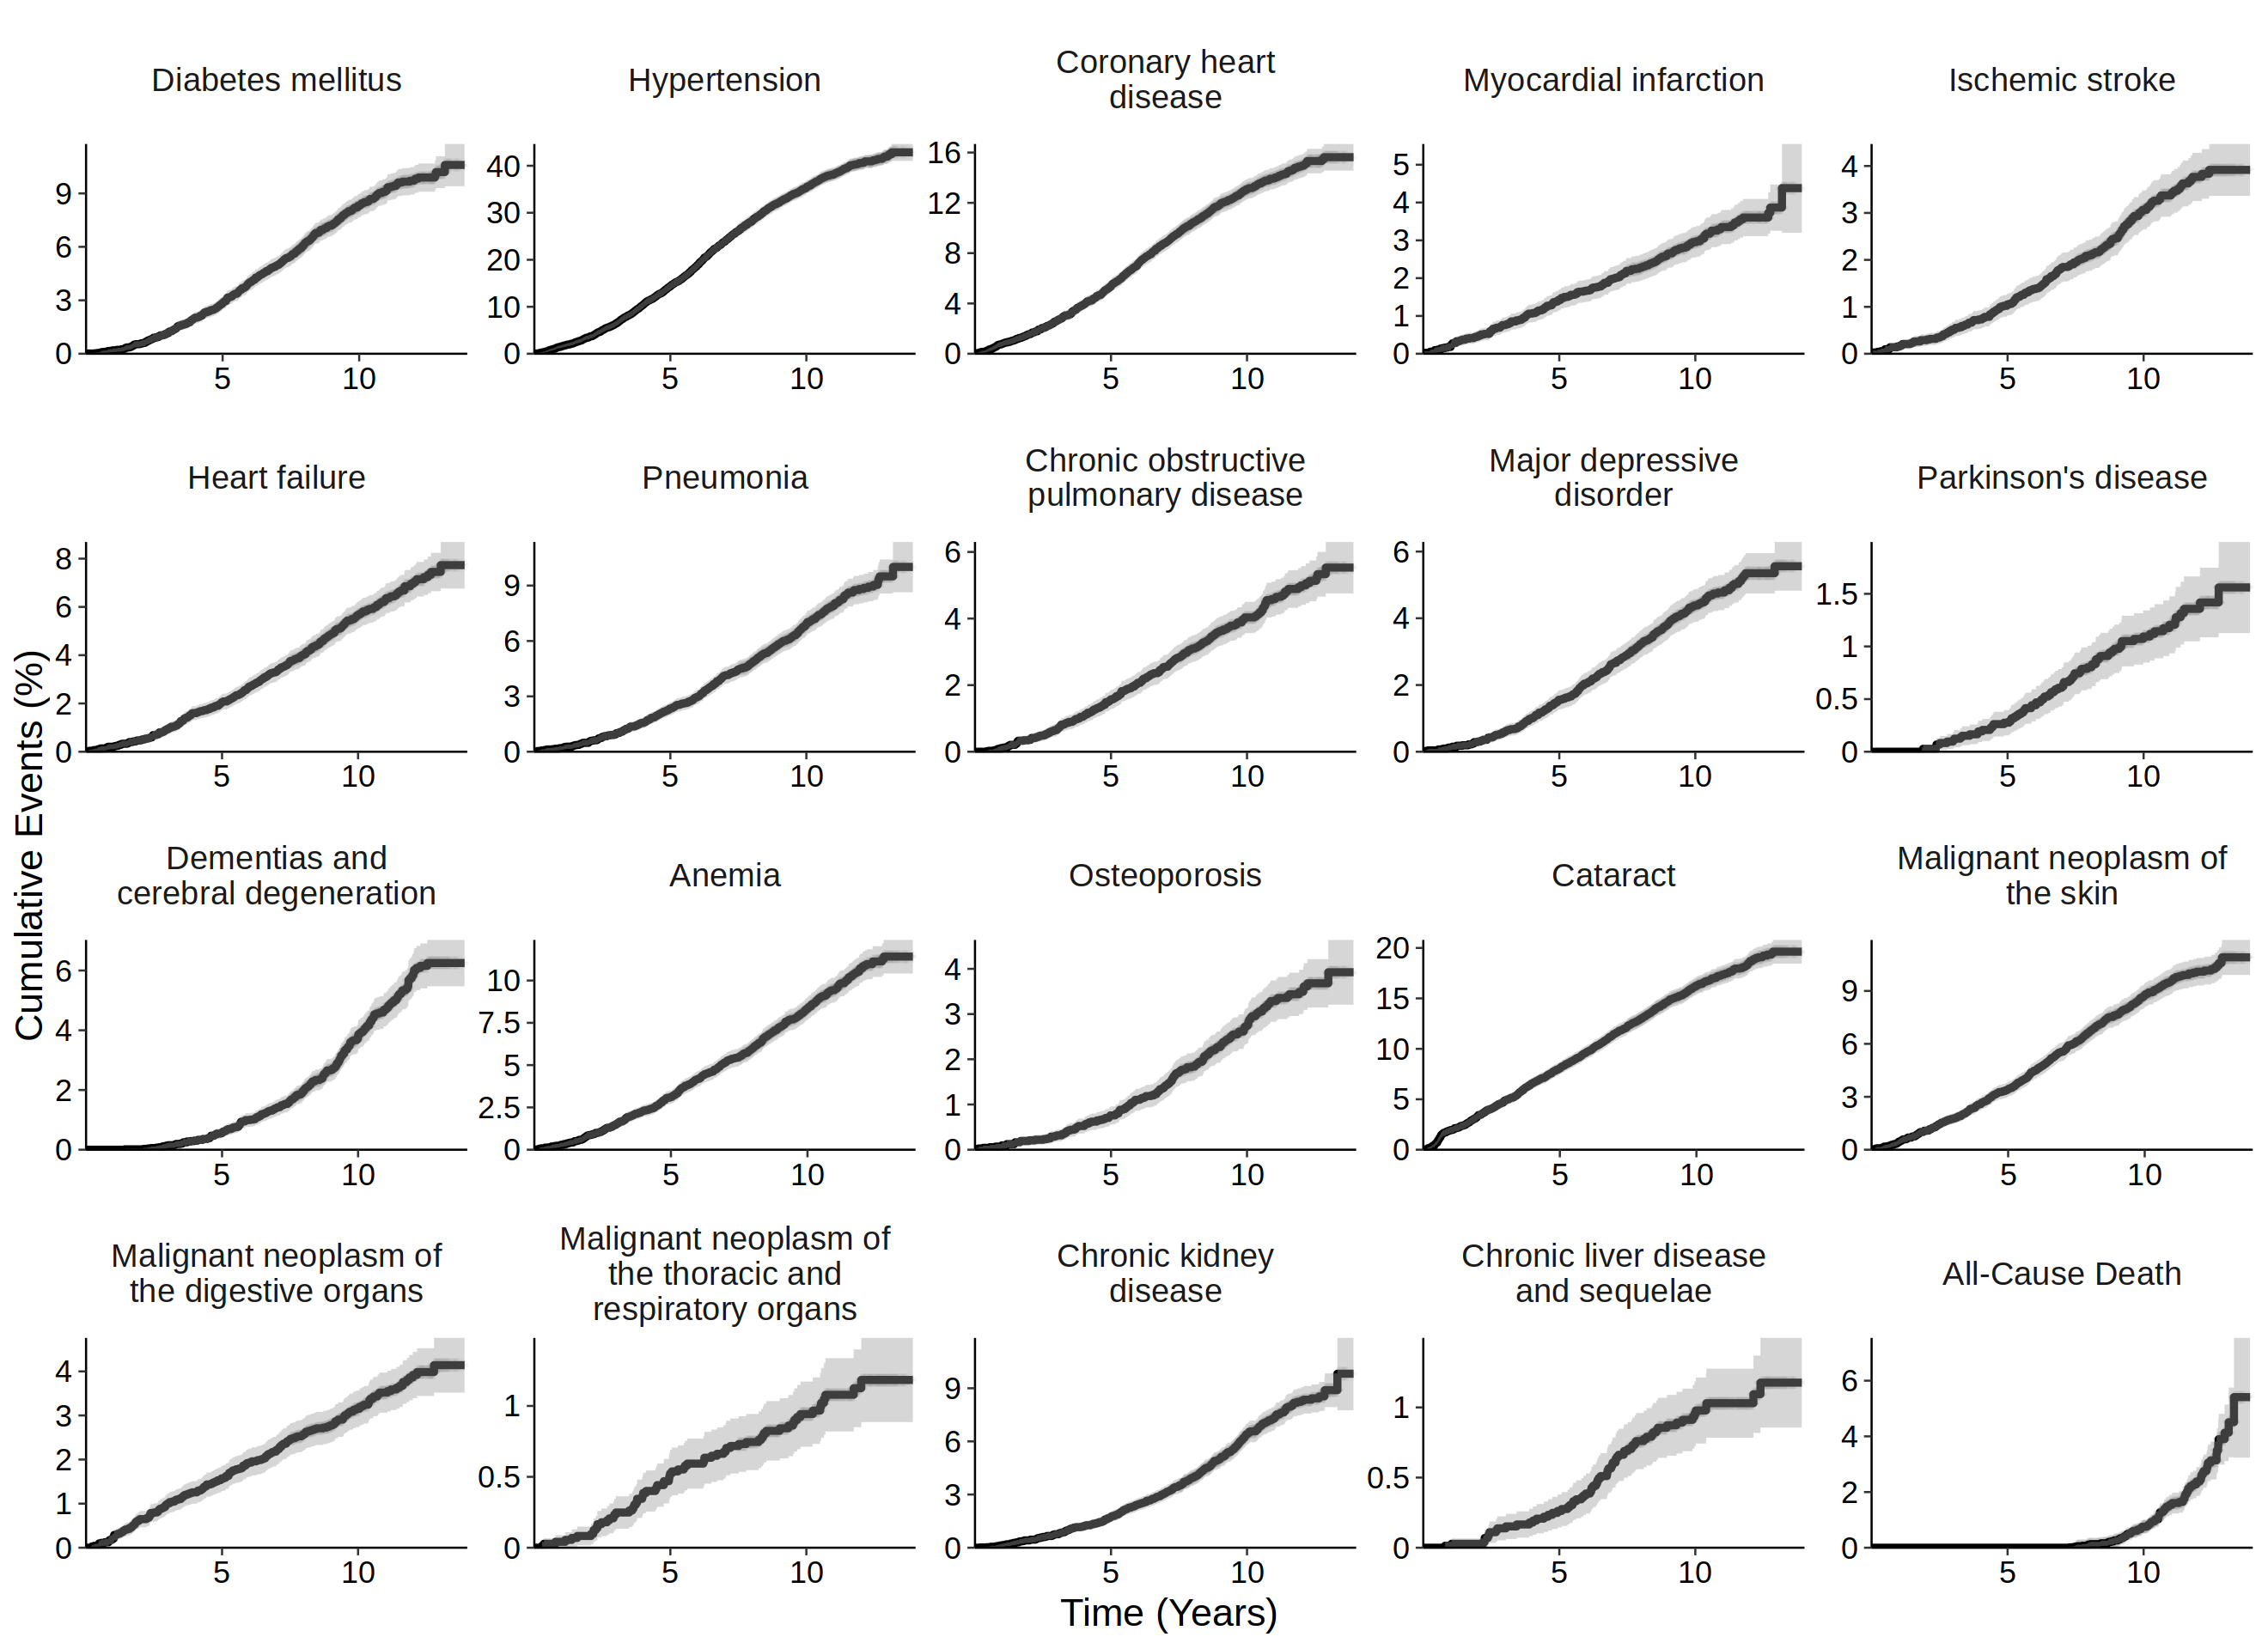

In [76]:
require("ggquickeda")
plot_width = 8.25; plot_height=6; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

temp = data_outcomes_long %>% filter(endpoint %in% endpoint_selection) %>% mutate(endpoint = factor(endpoint, levels=endpoint_selection))  %>% ungroup() 

fig2b = ggplot(temp, aes(time = time, status = as.integer(event))) +
    geom_km(trans = "event") + 
    geom_kmticks(trans = "event", size=0.2, alpha=0.01) + 
    geom_kmband(trans = "event") + 
    labs(x="Time (Years)", y="Cumulative Events (%)")+
    scale_y_continuous(labels = function(x) round(x*100, 1), expand=c(0, 0))+
    scale_x_continuous(expand=expansion(add=c(0, .1)), breaks=c(5, 10))+
    facet_wrap(~endpoint, scale="free", labeller = labeller(endpoint = as_labeller(endpoint_map, default=label_wrap_gen(22))), ncol=5) + theme(legend.position="none")
fig2b

In [57]:
#ep_cols = c('phecode_202_event', 'phecode_101_time')

In [58]:
data_outcomes %>% select(eid, all_of(ep_cols)) %>% pivot_longer(-eid, names_to=)

eid,phecode_202_event,phecode_401_event,phecode_404_event,phecode_404-1_event,phecode_431-11_event,phecode_424_event,phecode_468_event,phecode_474_event,phecode_286-2_event,⋯,phecode_328_time,phecode_164_time,phecode_726-1_time,phecode_371_time,phecode_103_time,phecode_101_time,phecode_102_time,phecode_583_time,phecode_542_time,OMOP_4306655_time
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RID00001,0,0,0,0,0,0,1,0,0,⋯,11.860370,11.860370,11.860370,11.8603696,11.860370,11.860370,11.860370,11.860370,11.860370,11.860370
RID00002,0,1,1,0,0,0,0,0,0,⋯,8.941821,8.941821,8.941821,8.9418207,8.941821,8.941821,8.941821,8.941821,8.941821,8.941821
RID00003,0,1,1,1,0,0,0,0,0,⋯,12.142368,12.142368,12.142368,12.1423682,12.142368,12.142368,12.142368,12.142368,12.142368,12.142368
RID00004,0,0,0,0,0,0,0,0,0,⋯,12.878850,12.878850,12.878850,12.8788501,12.878850,12.878850,12.878850,12.878850,12.878850,12.878850
RID00006,0,1,0,0,0,0,0,0,0,⋯,11.937029,11.937029,11.937029,11.9370294,7.882272,11.937029,11.937029,11.937029,11.937029,11.937029
RID00007,0,1,1,0,0,0,0,0,0,⋯,11.950719,11.950719,11.950719,11.9507187,9.160849,11.950719,11.950719,11.950719,11.950719,11.950719
RID00008,0,0,0,0,0,0,0,0,0,⋯,9.935661,9.935661,9.935661,9.6344969,9.935661,9.653662,9.935661,9.935661,9.935661,9.935661
RID00009,0,1,0,0,0,0,0,0,0,⋯,10.622861,10.622861,10.622861,10.6228611,10.622861,10.622861,10.622861,10.622861,10.622861,10.622861
RID00011,0,0,0,0,0,0,0,0,0,⋯,9.519507,9.519507,9.519507,9.5195072,9.519507,9.519507,9.519507,9.519507,9.519507,9.519507
